## Generate Figure 1, for sensitivity analysis manuscript
In this notebook, we generate the first figure (a methods/schematic figure) in the sensitivity analysis manuscript. 

This figure has three main components: actograms of the synthetic light schedules we consider, a parameter perturbation schematic, and examples of variations in the model state outputs based on different parameter values. We generate each of these components in the following sections. 

## First, generate the actograms
We plot a graphical representation of the simulated light and darkness schedule. We show one example schedule below, but this can be interactively changed to show actograms for any of the six schedules considered. 

First, we import the neccesary modules and define the light schedules.

In [6]:
# here we run the neccesary helper functions for the actogram
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from jax import grad, jit, jacfwd, jacrev
import jax.numpy as jnp

from hessian_normalized import Actogram
from hessian_normalized import HessianCircadian

sens=HessianCircadian()
params = sens.get_parameters_array()

figure_save = 'off'

# define the light schedules 
from lightschedules import RegularLight
from lightschedules import ShiftWorkLight
from lightschedules import ShiftWorkerThreeTwelves
from lightschedules import SocialJetLag
from lightschedules import SlamShift

ndays = 7
intensity = 979
dt = 0.1
ts=np.arange(0, 24*ndays, dt)
lights_rl = jnp.array([RegularLight(t, Intensity = intensity) for t in ts ]) # define the light schedules 
lights_sw = jnp.array([ShiftWorkLight(t,Intensity = intensity) for t in ts ])
lights_sw312 = jnp.array([ShiftWorkerThreeTwelves(t,Intensity = intensity) for t in ts ])
lights_sjl = jnp.array([SocialJetLag(t,Intensity = intensity) for t in ts ])
lights_ss = jnp.array([SlamShift(t,Intensity = intensity) for t in ts ])
lights_dark = jnp.zeros([len(ts),])

Next, we use the light schedules computed previously the generate the actogram. See hessian_normalized.py for more details on the actogram plot construction. 

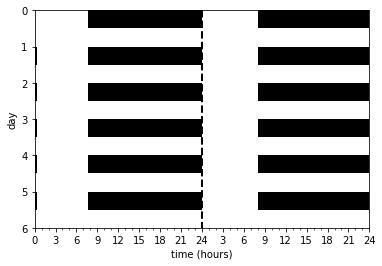

In [7]:
# here we generate the actogram plot: change light_schedule to the other light schedules to see all the plots
light_schedule = lights_rl
Actogram(ts, light_schedule)

We see a double-plotted actogram here, for one of the six schedules of interest. Change the light_schedule parameter to see results from the other light schedules. 

## Next, generate the parameter perturbations 
Here we get the default parameter values via the HessianCircadian module in hessian_normalized.py. For this methods figure, we plot an example of one of the parameters being varied. Note that this specific variation is not used to generate results later in the manuscript, but rather to demonstrate the methodology. 

For visual purposes, we plot the log of the parameter values. 

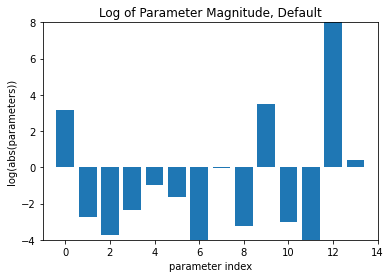

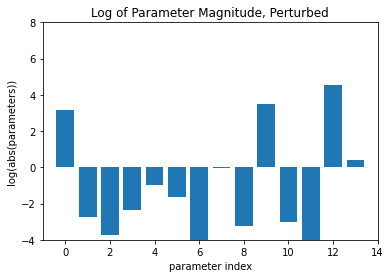

In [8]:
# plot of default parameters
plt.bar(range(len(params)),np.log(abs(params)))#np.log(params))
plt.axis([-1, 14, -4, 8])
plt.xlabel('parameter index')
plt.ylabel('log(abs(parameters))')
plt.title('Log of Parameter Magnitude, Default')
if figure_save == 'on':
    plt.savefig('figures_8_29/fig1_params_default.svg')
plt.show()

# generate example perturbed parameters
rand_percent_vec = 0.5
k = 12
params_perturb = params
log_params_perturbed = np.log(abs(params_perturb))
log_params_perturbed[k] = rand_percent_vec*log_params_perturbed[k]
plt.bar(range(len(params)),log_params_perturbed)
plt.axis([-1, 14, -4, 8])
plt.xlabel('parameter index')
plt.ylabel('log(abs(parameters))')
plt.title('Log of Parameter Magnitude, Perturbed')
if figure_save == 'on':
    plt.savefig('figures_8_29/fig1_params_perturb.svg')
plt.show()

## Finally, generate the model states under perturbed parameters 
Here we vary parameters by a fixed amount and show the changes that occur to the model states, as represented at each time point by $R \cos(\psi)$ where $R$ is the model amplitude and $\psi$ is the model phase. 

In later figures we will perform one-at-a-time parameter variations more systematically, but for the example methods figure here, we simply vary each parameter once and show the resulting changes to the model states. 

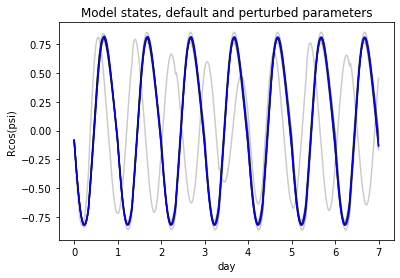

In [9]:
# get stored initial conditions, generated in ics_generate.ipynb
%store -r ics_rl
%store -r ics_sw
%store -r ics_sw312
%store -r ics_sjl
%store -r ics_ss
%store -r ics_dark

num_iter = 1

for j in range(len(params)):
    
    for m in range(num_iter):
        
        # perturb the parameters
        rand_percent_vec = 0.8+m*0.05
        params_perturb = params
        params_perturb = params_perturb.at[j].set(params[j]*rand_percent_vec)
        
        # generate perturbed model states 
        model_states_all_new_rl = sens.step_all_n(ics_rl, lights_rl, params_perturb, 0.10)
        plt.plot(ts/24,model_states_all_new_rl[:,0]*np.cos(model_states_all_new_rl[:,1]),'k',label = 'RL', alpha = 0.2)
        
        
       
        
model_states_all_rl = sens.step_all_n(ics_rl, lights_rl, params, 0.10)
plt.plot(ts/24,model_states_all_rl[:,0]*np.cos(model_states_all_new_rl[:,1]),'b',label = 'RL')
plt.xlabel('day')
plt.ylabel('Rcos(psi)')
plt.title('Model states, default and perturbed parameters')
if figure_save == 'on':
    plt.savefig('figures_8_29/fig1_outputs_ex.svg')
plt.show()

Parameters are shown for the regular light schedule over 7 days, as an example of the methology. Default parameters are given in blue, and perturbed parameter in gray. 